# **Data Science Regression Project**



**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

**Load Data**

In [26]:
dataframe1 = pd.read_csv("bengaluru_house_prices.csv")
dataframe1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [27]:
dataframe1.shape

(13320, 9)

In [28]:
dataframe1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Drop unwanted columns

In [29]:
dataframe2 = dataframe1.drop(['area_type', 'availability','society','balcony'], axis='columns')
dataframe2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**Data Cleaning**

In [30]:
dataframe2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [31]:
dataframe3 = dataframe2.dropna()
dataframe3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


**Feature Engineering**

BHK

In [32]:
dataframe3['bhk'] = dataframe3['size'].apply(lambda x: int(x.split(" ")[0]))
dataframe3 = dataframe3.drop(['size'], axis='columns')
dataframe3.head()

<ipython-input-32-49b6c68beedd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe3['bhk'] = dataframe3['size'].apply(lambda x: int(x.split(" ")[0]))


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


Total Sqft

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
# to identify the different values
dataframe3[~dataframe3['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [40]:
def convert_sqft_to_float(input):
  token = input.split("-")
  if len(token) == 2:
    return ((float(token[0])+float(token[1]))/2)
  try:
    return float(input)
  except:
    return None

In [42]:
dataframe4 = dataframe3.copy()
dataframe4['total_sqft'] = dataframe4['total_sqft'].apply(convert_sqft_to_float)
dataframe4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Price per sqft

In [44]:
dataframe5 = dataframe4.copy()
dataframe5['price_per_sqft'] = round(dataframe4['price']*100000/dataframe4['total_sqft'],2)
dataframe5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


In [45]:
dataframe5.to_csv("bhp.csv",index=False)

In [48]:
dataframe5["location"] = dataframe5["location"].apply(lambda x: x.strip())
location_counts = dataframe5["location"].value_counts(ascending = False)
location_counts

,count
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [49]:
location_stats_less_than_10 = location_counts[location_counts<=10]
location_stats_less_than_10

,count
location,
Naganathapura,10
Sadashiva Nagar,10
Nagappa Reddy Layout,10
BTM 1st Stage,10
Sector 1 HSR Layout,10
...,...
Vasantapura main road,1
Bapuji Layout,1
1st Stage Radha Krishna Layout,1


In [50]:
dataframe5.location = dataframe5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(dataframe5.location.unique())

242

In [51]:
dataframe5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


Outlier Layer removal using - Domain Knowledge

In [52]:
dataframe6 = dataframe5[~(dataframe5.total_sqft/dataframe5.bhk < 350)]
dataframe6.shape

(12152, 6)

In [53]:
dataframe6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.89
4,Kothanur,1200.0,2.0,51.00,2,4250.00


Outlier Layer removal using - Mean and Standard Deviation

In [54]:
dataframe6.price_per_sqft.describe()

,price_per_sqft
count,12106.000000
mean,6184.466894
std,4019.983534
min,267.830000
25%,4200.030000
50%,5261.110000
75%,6800.000000
max,176470.590000


In [56]:
def remove_pps_outliers(dataframe):
    df_out = pd.DataFrame()
    for key, subdf in dataframe.groupby('location'):
        mean_value = np.mean(subdf.price_per_sqft)
        std_value = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean_value - std_value)) & (subdf.price_per_sqft<=(mean_value + std_value))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
dataframe7 = remove_pps_outliers(dataframe6)
dataframe7.shape

(9838, 6)

Different BHK Property price

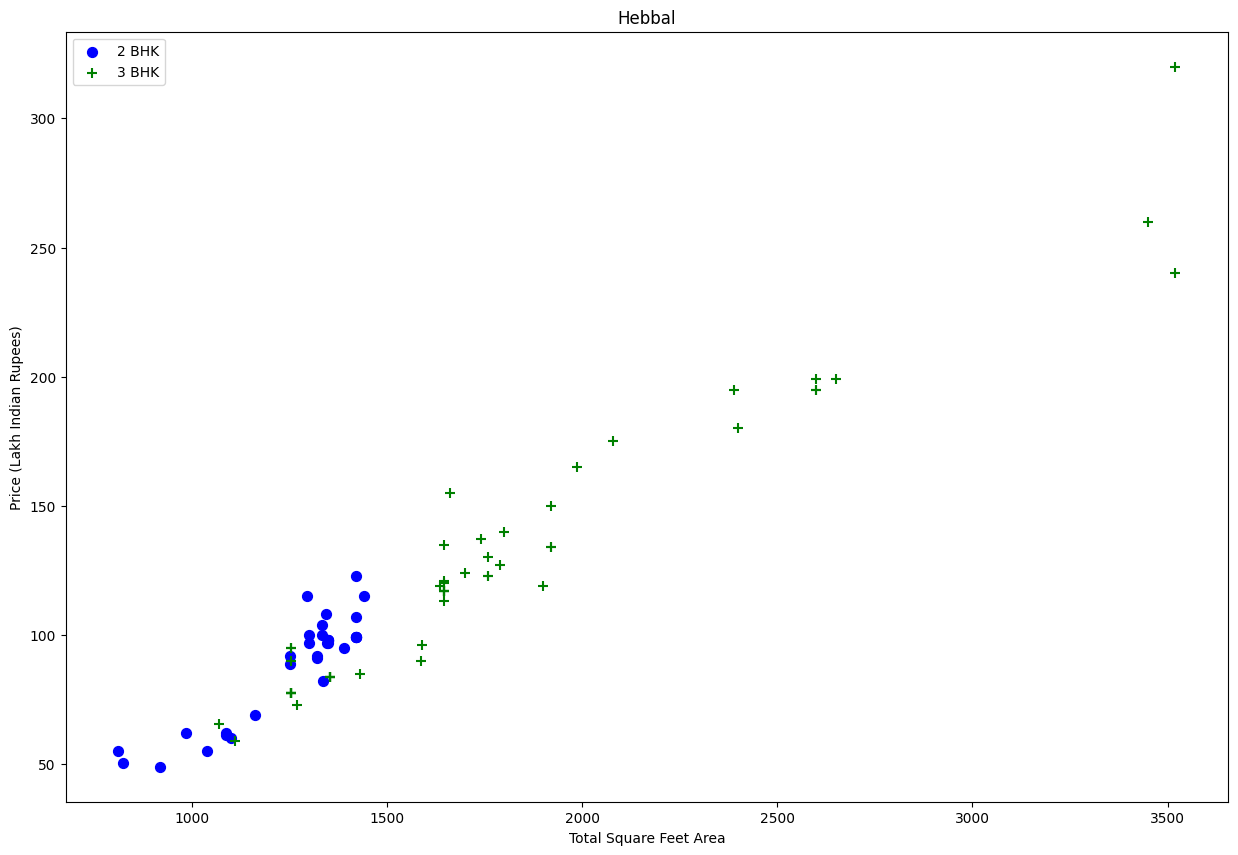

In [105]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(dataframe7,"Hebbal")

To fix the above outlier

In [100]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dataframe8 = remove_bhk_outliers(dataframe7)
dataframe8.shape

(7035, 6)

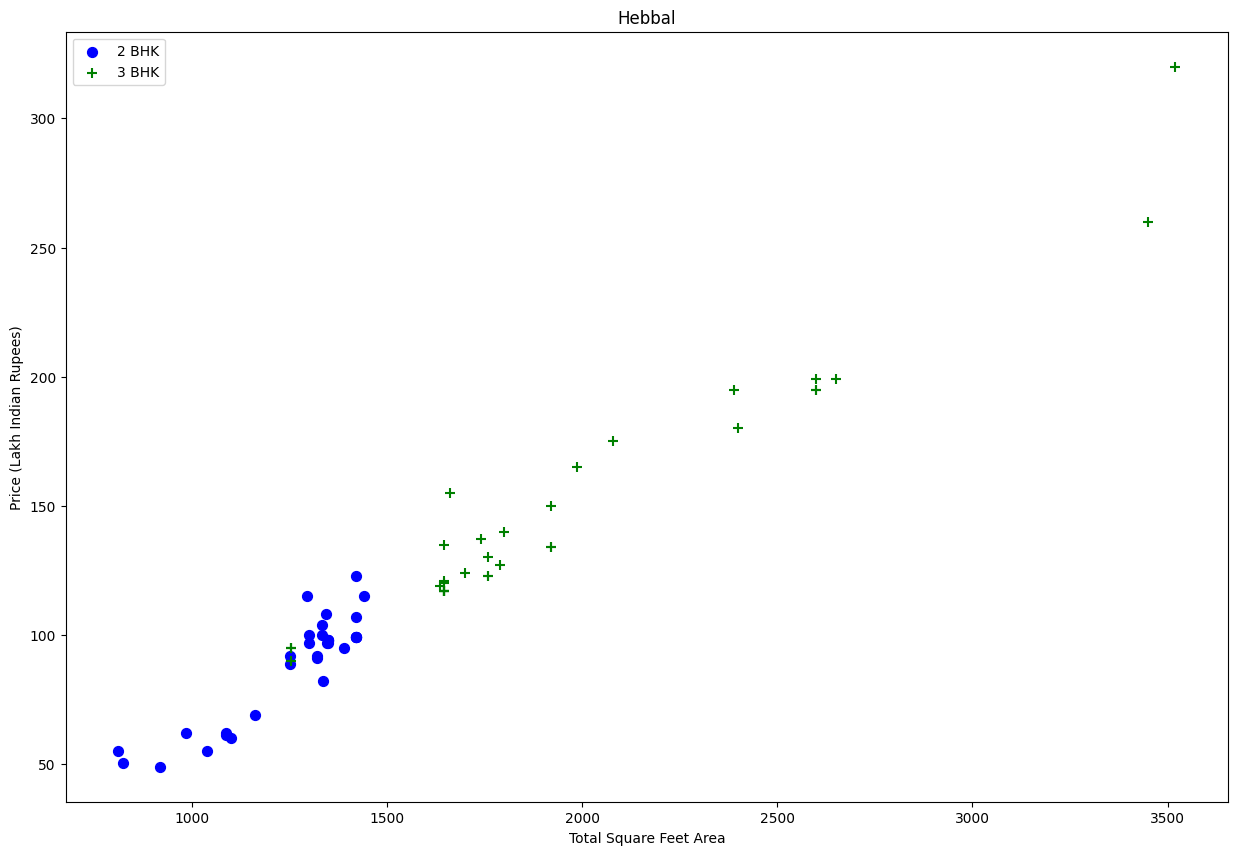

In [106]:
plot_scatter_chart(dataframe8,"Hebbal")

Normal Distribution

Text(0, 0.5, 'Count')

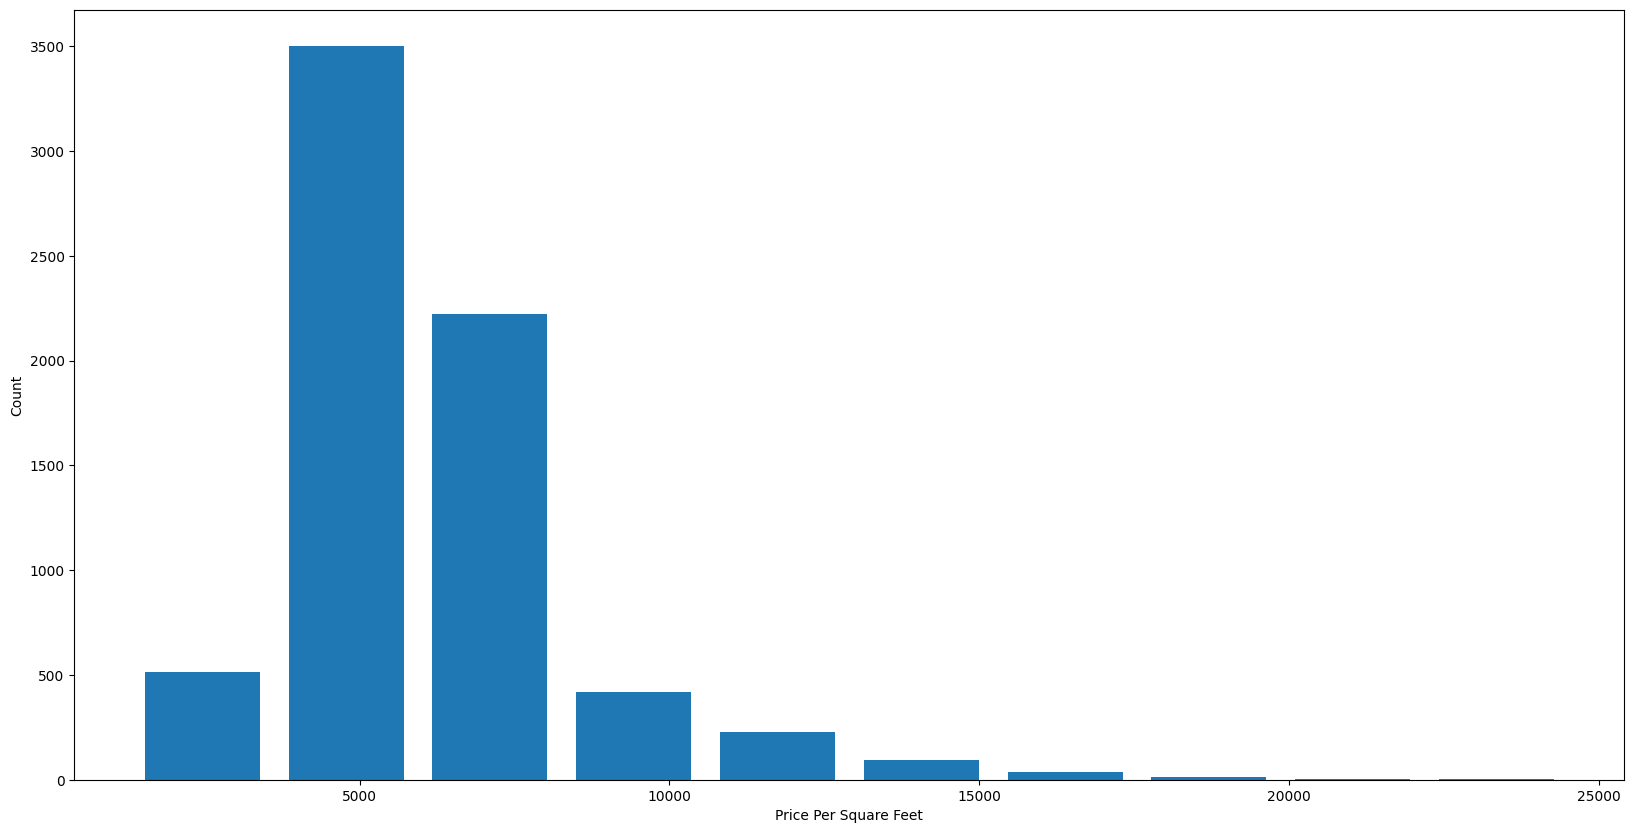

In [107]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataframe8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Outlier Removal using bath features

In [85]:
dataframe8.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

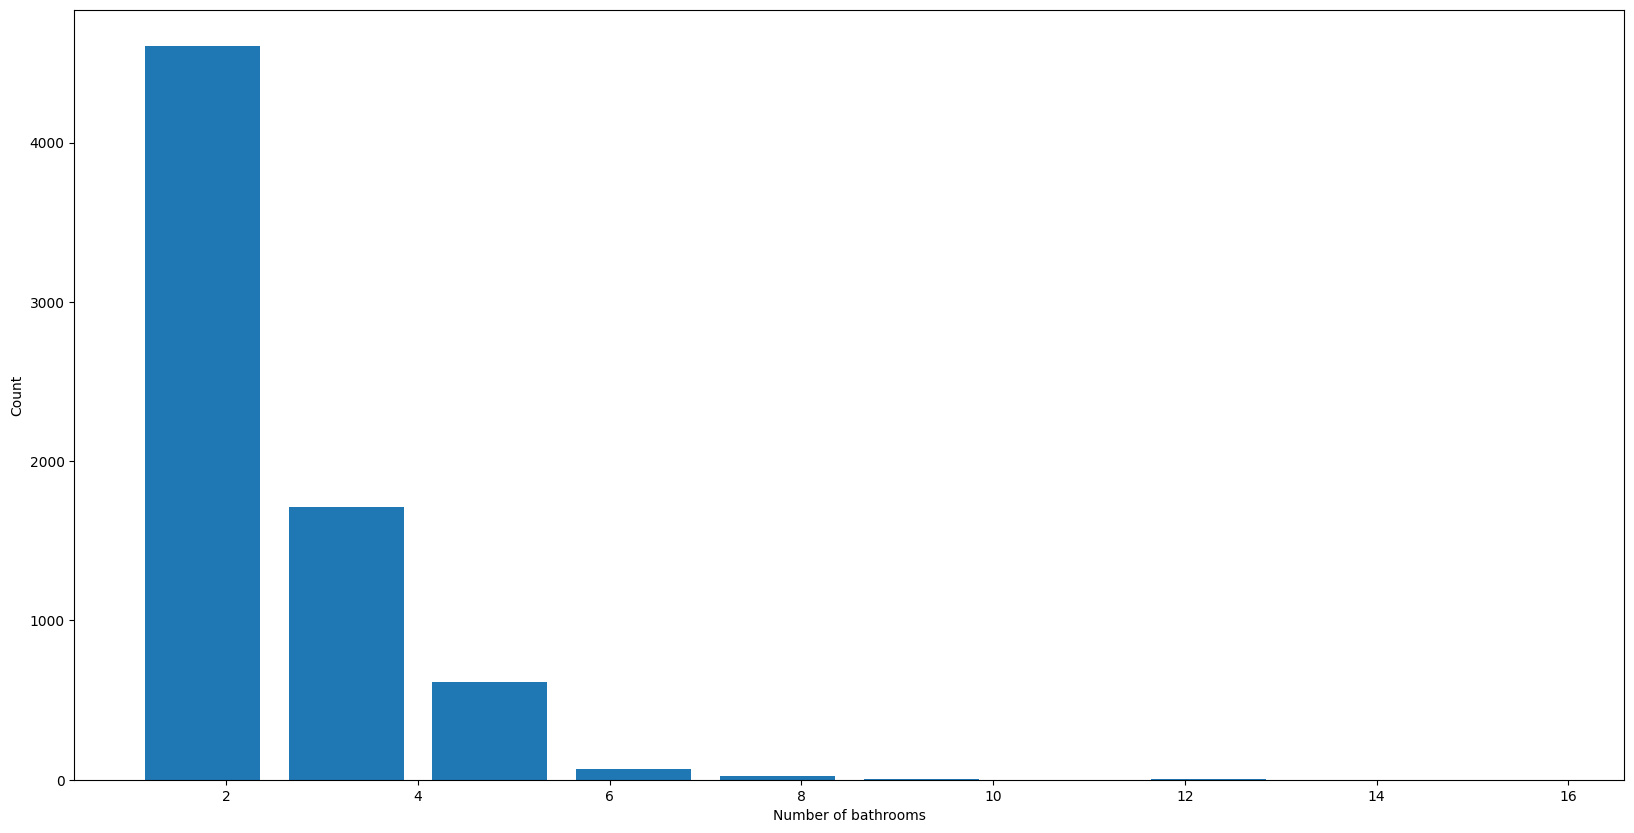

In [86]:
plt.hist(dataframe8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [87]:
dataframe9 = dataframe8[dataframe8.bath < dataframe8.bhk+2]
dataframe10 = dataframe9.drop(['price_per_sqft'],axis='columns')
dataframe10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


One-Hot Encoding (Location)

In [88]:
dummies = pd.get_dummies(dataframe10.location)
dummies = dummies.astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# merging two df and removing unwanted columns
dataframe11 = pd.concat([dataframe10.drop('location',axis='columns') ,dummies.drop('other',axis='columns')],axis='columns')
dataframe11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Model Building**

In [90]:
dataframe11.shape

(6961, 245)

In [91]:
X = dataframe11.drop(['price'], axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y = dataframe11['price']
y.head()

,price
0,428.0
1,194.0
2,235.0
3,130.0
4,148.0


Finding best model using GridSearchCV

In [110]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.842350,{'fit_intercept': False}
1,lasso,0.689135,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.730251,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**From the above, we can conclude that the best model here is the Linear Regression model.**

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8406577825953438

**Model Testing**

In [112]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0] # to get the column number based on the location name

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

**Predicted Outputs**

In [113]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


160.50413019529483

In [114]:
predict_price('Vijayanagar',1600, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


111.6477964764122